<a href="https://colab.research.google.com/github/Manya-BM/Manya-BM/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💓 Heart Disease Classification using ML

## 🎯 Objective:
Build and compare multiple classification models to predict heart disease. Analyze performance, training speed, and interpretability.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import time


In [ ]:

df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST

Text(0.5, 1.0, 'Target Variable Distribution')

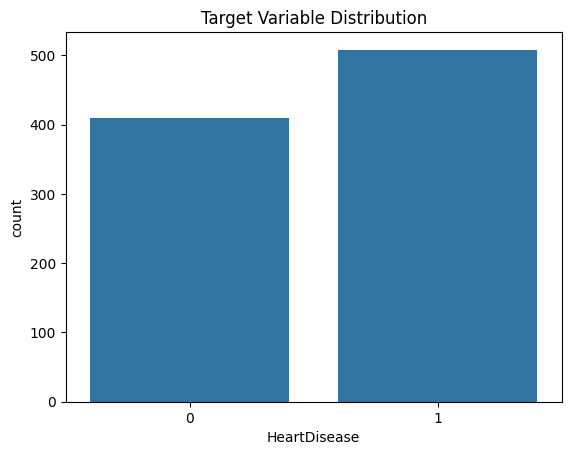

In [ ]:
# Check basic info
df.info()

# Check for null values
print(df.isnull().sum())

# Describe stats
df.describe()

# Target distribution
sns.countplot(x='HeartDisease', data=df)
plt.title("Target Variable Distribution")


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


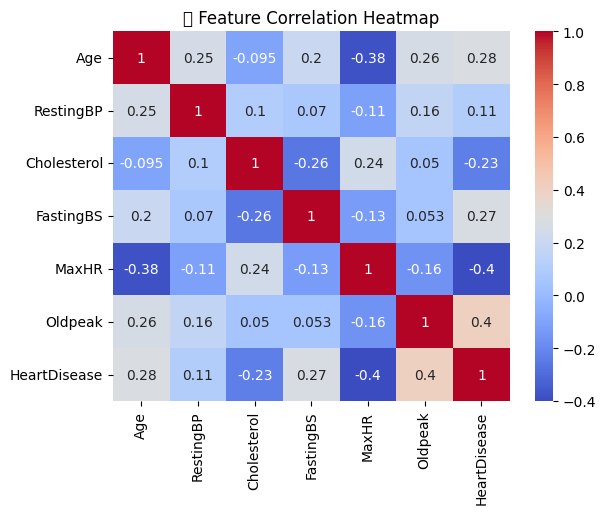

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("📊 Feature Correlation Heatmap")
plt.show()


In [ ]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time()

    y_pred = model.predict(X_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Time": round(end - start, 4),
        "Report": classification_report(y_test, y_pred, output_dict=True),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Model": model
    }


In [ ]:
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name}: CV Accuracy = {np.mean(scores):.4f} ± {np.std(scores):.4f}")


Logistic Regression: CV Accuracy = 0.8278 ± 0.0355
Decision Tree: CV Accuracy = 0.7145 ± 0.0533
Random Forest: CV Accuracy = 0.8278 ± 0.0455
SVM: CV Accuracy = 0.8257 ± 0.0321


/tmp/ipython-input-588695643.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=acc, palette='YlGn')
/tmp/ipython-input-588695643.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=time_taken, palette='Oranges')
/tmp/ipython-input-588695643.py:14: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-588695643.py:14: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu San

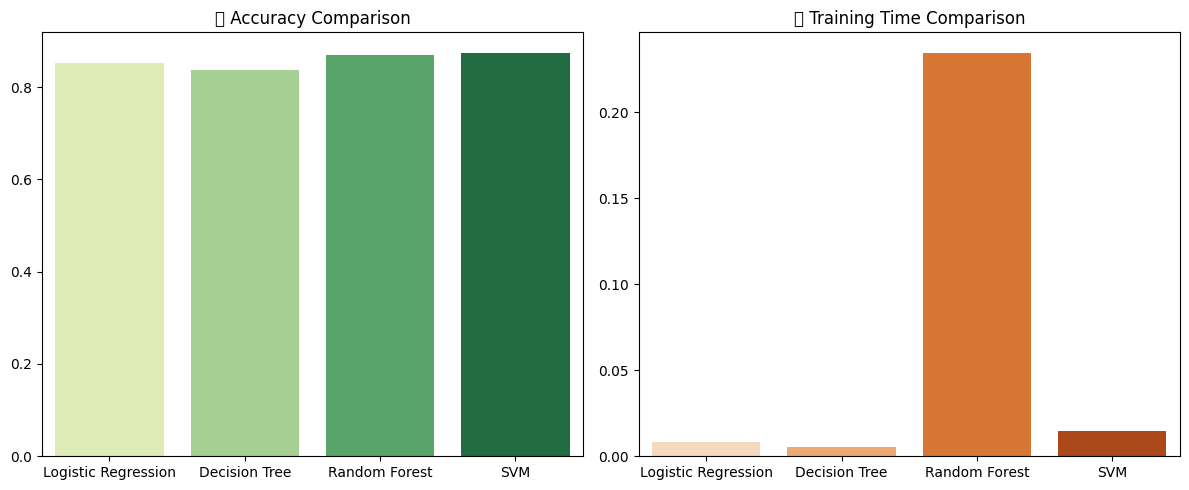

In [ ]:
acc = [results[m]['Accuracy'] for m in results]
time_taken = [results[m]['Time'] for m in results]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=list(results.keys()), y=acc, palette='YlGn')
plt.title('✅ Accuracy Comparison')

plt.subplot(1, 2, 2)
sns.barplot(x=list(results.keys()), y=time_taken, palette='Oranges')
plt.title('⏱️ Training Time Comparison')

plt.tight_layout()
plt.show()


In [ ]:
summary = pd.DataFrame({
    "Model": list(results.keys()),
    "Accuracy": [results[m]['Accuracy'] for m in results],
    "Training Time (s)": [results[m]['Time'] for m in results]
})

summary = summary.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
summary.style.background_gradient(cmap='Greens', subset=['Accuracy']).set_caption("📋 Model Summary")


,Model,Accuracy,Training Time (s)
0,SVM,0.875000,0.014600
1,Random Forest,0.869565,0.234800
2,Logistic Regression,0.853261,0.008400
3,Decision Tree,0.836957,0.005200


/tmp/ipython-input-1407178157.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


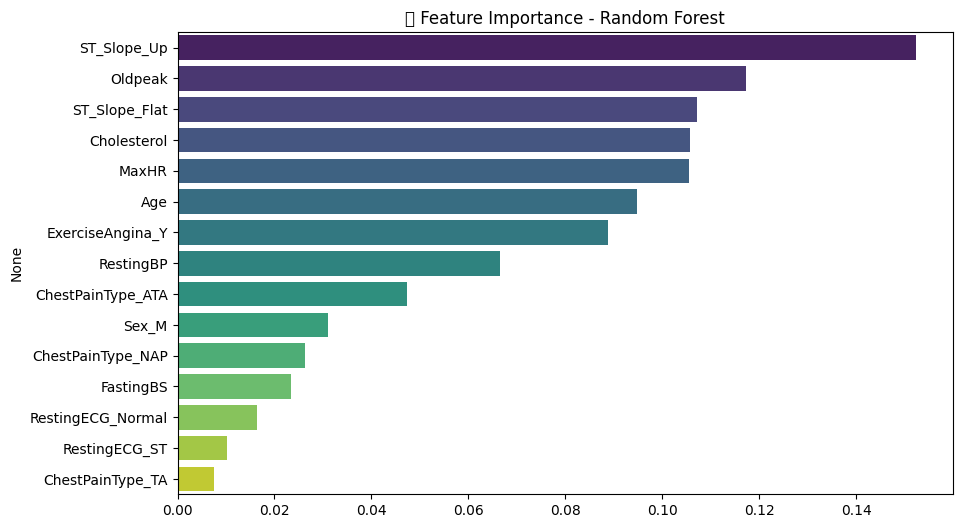

In [ ]:
rf_model = results["Random Forest"]["Model"]
importances = rf_model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title("🔍 Feature Importance - Random Forest")
plt.show()


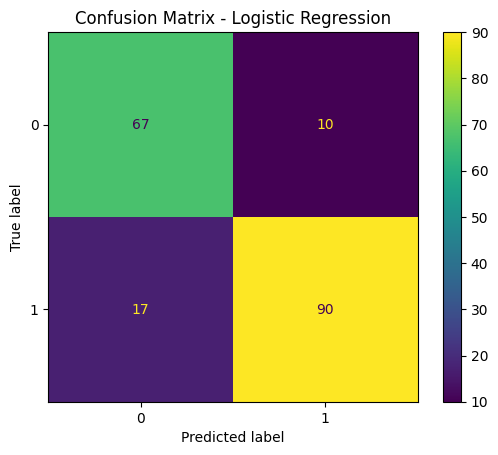

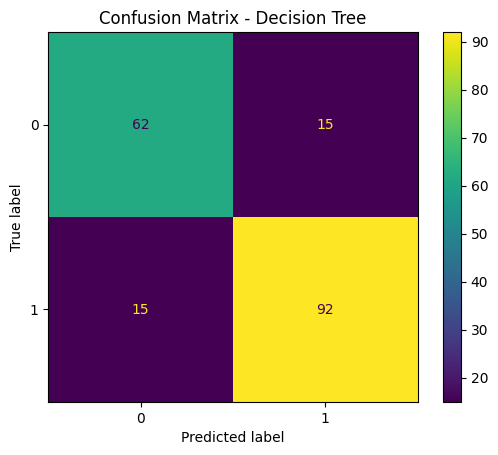

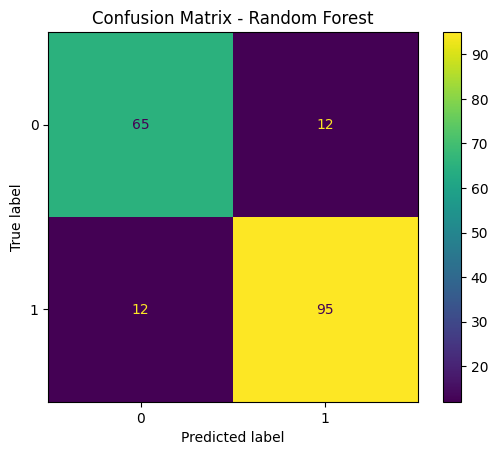

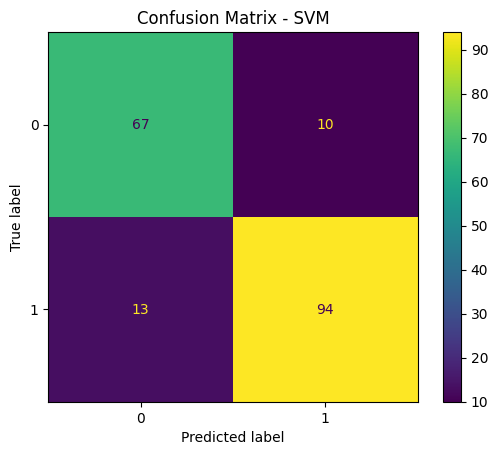

In [ ]:
for name in models:
    ConfusionMatrixDisplay(results[name]["Confusion Matrix"]).plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


# ✅ Project Conclusion

### 🏆 Best Model:
Random Forest — Highest accuracy due to ensemble technique and robustness to noise.

### ⚡ Fastest Model:
Logistic Regression — Trains instantly and works well on linearly separable data.

### 🔍 Most Interpretable:
- Logistic Regression: Easy to explain coefficients
- Decision Tree: Visually understandable rules

### 📌 When to Use:
- **Logistic Regression**: When speed and explainability are key
- **Random Forest**: When performance is more important than explainability
- **SVM**: When data is complex and high-dimensional
- **Decision Tree**: When you need to visualize decision logic
